# Assignment - 2: PHY F242 - Quantum Mechanics - I

Due on: 29$^{th}$ April, 2022 - 11:59pm

In this Assignment, we will numerically simulate the quantum systems covered in the lectures, namely the Infinite Square Well, and the Quantum Harmonic Oscillator.

1. We will start off with our knowledge of the solutions (energy eigen-states) of the quantum systems and obtain a visualization of the time-evolution of the probability density.

2. Next, we will look into a method to represent the Hamiltonian of the system in form of a square matrix (matrix representation of the Hamiltonian operator) and use the matrix representation to numerically obtain energy eigen-states and eigen-values of the system. The results of the computation can be verified with our knowledge about the solution of the systems

3. Once, the eigen-states are obtained, one way to obtain the time-evolution is Part-1. In this part, we will look into an alternative method of time-evolution. For the Infinite Square Well, and the Quantum Harmonic Oscillator, this time-evolution succession must match that in Part-1. 

In [ ]:
# Notebook setup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.constants import h
H_BAR = h/(2*np.pi)

# Every consequent cell has the total points associated with it at the start, 
# followed by code-snippets which indicate the distribution of points.
# The breakdown of points are:
# Q1 - 11 points
# Q2 - 4 points
# Q3 - 5 points

' \nSubmitted by:\n(Provide your name and BITS ID)\nName - Vaibhav Ganatra\nID - 2019A7PS0010G\n'

### Q1. Time-Evolution of the proability density of an electron in The Infinite Square Well

In this section, we will consider an initial wave-function $ψ(x,0)$, which is an equal superposition of the first 'N' eigen-states $\phi_n$'s of the Infinite Square Well (we can start off with any arbitrary initial wavefunction, we choose this particular superposition for simplicity and convenience).
We will use N=2 for simplicity

Using only the initial wavefunction (and omitting details about how it is prepared), we find the components $c_n$'s of $\psi(x,0)$ along $\phi_n$'s, i.e. we express $\psi(x,0)$ as $Σ_{n=1}^{N} c_n \phi_n$ 

Hence, $\psi(x,t)$ is expressed as $Σ_{n=1}^{N} c_n \phi_n * e^{-iE_nt/ħ}$

where $E_n$ is the energy of the $n^{th}$ eigen-state

In [ ]:
N = 2

Here, the $\phi_n$'s and $E_n$'s are expressed as:

$\phi_n = \sqrt{\dfrac{2}{L}} sin (\dfrac{n\pi x}{L})$

$E_n = \dfrac{n^2 \pi^2 ħ^2}{2mL^2}$

where $L$ is the length of the well and $m$ is the mass of the particle.

In [ ]:
# L is the width of the Infinite Square Well
L = 2
# In numerical computations, continuous functions are discretized in their representation.
# For example, a continuous function between 0 and L is represented as a vector with L*NUM_DIVISIONS_PER_LENGTH numbers, where the i'th number corresponds to psi(0+i/NUM_DIVISIONS_PER_LENGTH) 
NUM_DIVISIONS_PER_LENGTH = 150

In [ ]:
# Total - 0.5 points
# n'th eigen-state of the infinite square well (isw)
def isw_eigen_state(n, x):
  return np.sqrt(2/L)*np.sin(n*np.pi*x/L) # 0.5 points

In [ ]:
# Total - 1 point
x = np.linspace(0,L,L*NUM_DIVISIONS_PER_LENGTH)

# First 'N' Eigen-States of the Infinite Square Well
isw_phi = np.zeros((N, L*NUM_DIVISIONS_PER_LENGTH))
for i in range(N):
  isw_phi[i] = isw_eigen_state(i+1,x) # 1 - 0.5 points

# Preparing psi(x,0) as an equal superposition of the first 'N' eigen-states
q1_psi = 1/np.sqrt(N)*np.sum(isw_phi, axis=0) # 2 - 0.5 points

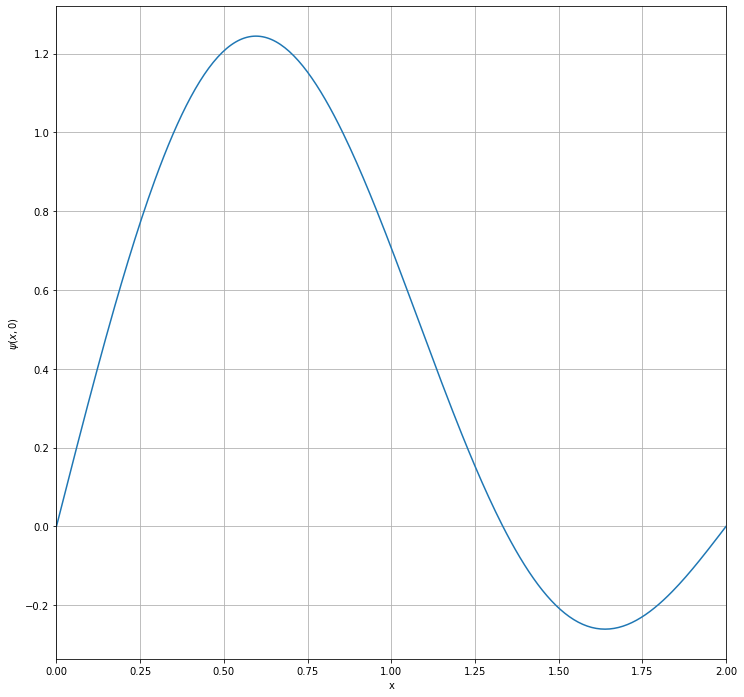

In [ ]:
# Visualizing the initial wavefunction
plt.figure(figsize=(12,12))
plt.xlabel("x")
plt.ylabel("$\psi(x,0)$")
plt.xlim(0,L)
plt.plot(x,q1_psi)
plt.grid()

In [ ]:
# Total - 1 point
# Utility function to take in a wavefunction and return the probability density
def mod_psi_square(psi):
  return np.conj(psi)*psi # 1 point

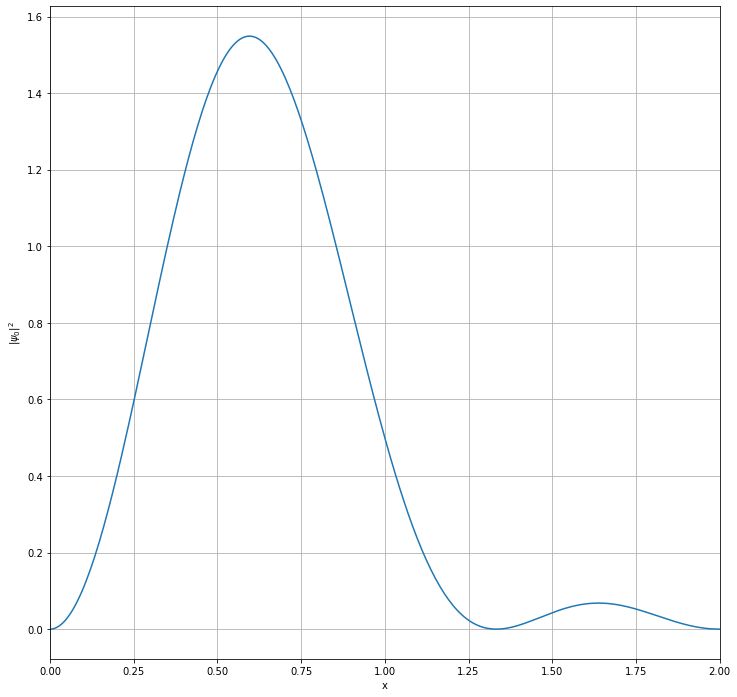

In [ ]:
# Visualization of probability density
plt.figure(figsize=(12,12))
plt.xlabel("x")
plt.ylabel("$|\psi_0|^2$")
plt.xlim(0,L)
plt.plot(x,mod_psi_square(q1_psi))
plt.grid()

In [ ]:
# Total - 2 points
# Checking normalization of the wavefunction
def check_normalized(psi):
  prob_density = mod_psi_square(psi) # 1 - 1 point
  constant = np.sum(prob_density/NUM_DIVISIONS_PER_LENGTH) # 2 - 1 point
  print(f"Normalization Constant = {constant}")
  return constant == 1

check_normalized(q1_psi)

Normalization Constant = 0.9966666666666666


False

In [ ]:
# Total - 1 point
# Due to numerical approximations and errors, it might become necessary to renormalize the wavefunction
def normalize(psi):
  prob_density = mod_psi_square(psi) 
  constant = np.sum(prob_density/NUM_DIVISIONS_PER_LENGTH)
  return psi/np.sqrt(constant)  # 1 point

In [ ]:
# Total - 1 point
# Normalize the state
isw_psi = normalize(q1_psi) # 1 - 0.5 points
# Verify that the state is normalized
check_normalized(q1_psi) # 2 - 0.5 points

Normalization Constant = 0.9966666666666666


False

In [ ]:
# Total - 1 point
# Now we write a function to find the components of a given psi along the eigen states phi_i's
def find_coefficients(psi, eigen_states):
  coefficients = []
  for state in eigen_states:
    coefficients.append(np.dot(state, psi)/NUM_DIVISIONS_PER_LENGTH) # 1 point
  return np.array(coefficients)

In [ ]:
# Total - 0.5 points
coefficients = find_coefficients(q1_psi,isw_phi) # 0.5 points
# Coefficients along various eigen-states
print(coefficients)

[0.70474976 0.70474976]


Now that we have the coefficients of $\psi(x,0)$ along each of the eigen-states, and 
we are aware of the time-evolution of the eigen-states, $\psi(x,t)$ can be expressed as:

$\psi(x,t) = Σ_{n=1}^{N}c_n*\phi_n(x)*e^{-iE_nt/\hbar}$

In [ ]:
# Total - 0.5 points
# Let us consider an electron in the infinite square well
M = 9.1093837e-31

# n'th energy eigen value E_n for Infinite Square Well
def isw_e_n(n):
  return n**2*np.pi**2*H_BAR**2/(2*M*L**2) # 0.5 points

In [ ]:
# Total - 1 point
# Function to evaluate psi(x,t) by applying the above time-evolution expression
def psi_x_t(x, t, coefs, eigen_states, eigen_values):
  psi_x_t = np.zeros_like(x,dtype='complex128') # 1 - 0.5 points
  for i,c in enumerate(coefs):
    psi_x_t+=c*eigen_states[i]*np.exp(-1j*eigen_values[i]*t/H_BAR) # 2 - 0.5 points
  return psi_x_t

In [ ]:
# Total - 0.5 points
isw_e = [isw_e_n(i+1) for i in range(N)] # 0.5 points
isw_e

[1.5061668508074064e-38, 6.024667403229626e-38]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


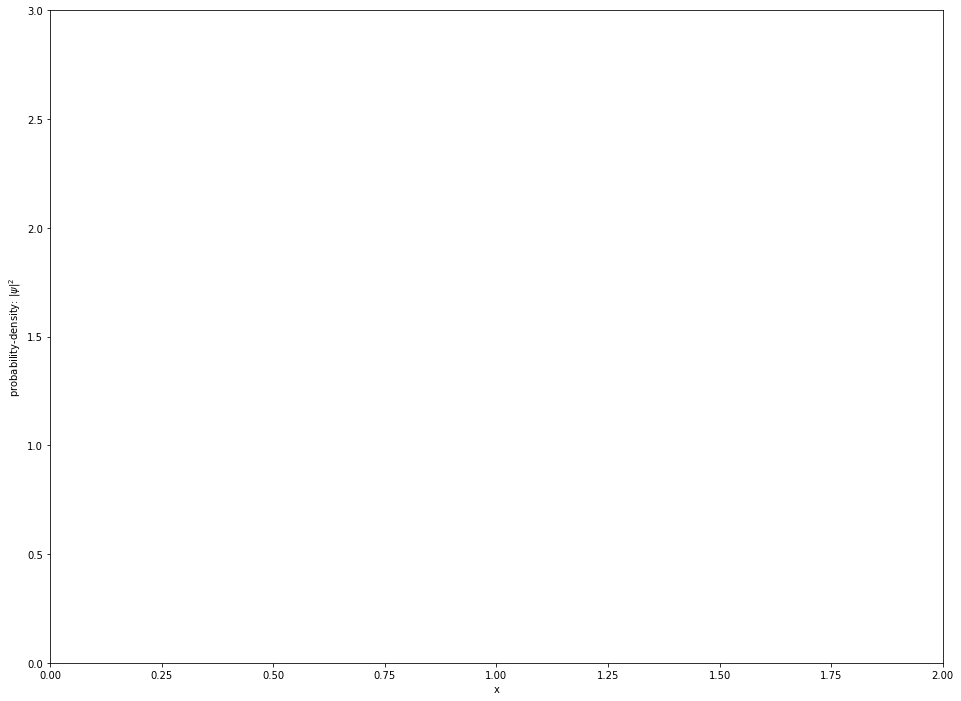

In [ ]:
# Total - 1 point
# Generate animation of the time-evolution of the probability density
fig = plt.figure()
fig.set_size_inches((16,12))
axis = plt.axes(xlim=(0,L),ylim=(0,3))
axis.set_xlabel('x')
axis.set_ylabel('probability-density: $|\psi|^2$')

line, = axis.plot([],[],lw=3)

def init():
  line.set_data([],[])
  return line

def animate(t):
  # To speed up the animation
  t = t*250
  psi = psi_x_t(x,t,coefficients, isw_phi, isw_e) # 1 - 0.5 points
  y = mod_psi_square(psi) # 2 - 0.5 points
  line.set_data(x,y)
  return line

anim = FuncAnimation(fig,animate,init_func=init)
HTML(anim.to_html5_video())
# anim.save("Animation.mp4")

In [ ]:
"""
For Q1, there are a total of 12 cells with points distribution as: 
0.5 + 1 + 1 + 2 + 1 + 1 + 1 + 0.5 + 0.5 + 1 + 0.5 + 1 = 11 points
"""

'\nFor Q1, there are a total of 12 cells with points distribution as: \n0.5 + 1 + 1 + 2 + 1 + 1 + 1 + 0.5 + 0.5 + 1 + 0.5 + 1 = 11 points\n'

### Q2. Numerically finding the eigenstates and eigen-values of a particle the Infinite Square Well by representing the Hamiltonian as a Square Matrix

In this section, we will express the Hamiltonian of the Infinite Square Well as a Square Matrix. Thus, the eigen-states and functions of this matrix (found using various the linear algebra routines in python) are the stationary states of the system. Once these are found, the time-evolution of the probability density can be simulated using Part-1. Hence, for any arbitrary wavefunction, the time-evolution can be found numerically calculated!

In this implementation, $\psi$ is discretized between -10 to 10 in form of a finite vector. The $j^{th}$ entry in this vector corresponds to $\psi(y,0)$ where y = -L + j/ NUM_DIVISIONS

From the Schrodinger's Equation, we know

$\hat{H}ψ = -\dfrac{ħ^2}{2m}\dfrac{∂^2ψ}{∂x^2} + V(x)ψ$

#### Representation of V(x) as an operator:

V(x) is an operator that acts on $\psi(x)$ and the result is $\psi(x)$ multiplied by V(x). 
Numerically, $\psi(x)$ is represented as a vector, where the $j^{th}$ number means as above. Therefore, V(x) must be a diagonal matrix where the j'th entry in the diagonal corresponds to V(y) where y = -L + j/ NUM_DIVISIONS

For the harmonic oscillator we consider a Proton, $m=1.67262e−27$, $ω=1$, so $V(x)=\dfrac{mx^2}{2}$

In [ ]:
# Due to the fact that V is not used in the Hamiltonian calculation for the Infinite Square Well,
# this cell does not carry any points. It is only for your information
NUM_DIVISIONS = L*NUM_DIVISIONS_PER_LENGTH
# Represent V(x) as a square matrix
V = np.zeros((NUM_DIVISIONS, NUM_DIVISIONS))
for i in range(NUM_DIVISIONS):
  V[i][i] = x[i]**2/2

V*=M
V.shape

(300, 300)

#### Representation of $\dfrac{∂^2\psi}{∂x^2}$ as an operator:

We know, $\dfrac{∂ \psi}{∂x}$ is expressed as the limit:

$\dfrac{∂ \psi}{∂x} = lim_{δx → 0}\dfrac{\psi(x+δx) - ψ(x-δx)}{2δx}$

In a similar manner, $\dfrac{∂^2 \psi}{∂x^2}$ is expressed as:

$\dfrac{∂^2 \psi}{∂x^2} =lim_{δx → 0}\dfrac{\psi(x+δx) - 2ψ(x) + ψ(x-δx)}{δx^2}$.

Hence, the matrix representation of the double-derivate should be such that it takes in a vector $\psi$ and for element $\psi[i]$, it computes the resultant column vector $\dfrac{∂^2 \psi}{∂x^2}$, where $\dfrac{∂^2 \psi}{∂x^2}[i] = \dfrac{\psi[i+1] - 2ψ[i]+ ψ[i-1]}{δx^2}$

In [ ]:
# Total - 2 points for the correct Double-Derivative Matrix Formulation
# Construction of the Double-Derivate Operator as a Matrix
H = np.zeros((NUM_DIVISIONS,NUM_DIVISIONS))
H[0][0]=-2
H[0][1]=1
H[NUM_DIVISIONS-1][NUM_DIVISIONS-1]=-2
H[NUM_DIVISIONS-1][NUM_DIVISIONS-2]=1
for j in range(1,NUM_DIVISIONS-1):
  H[j][j]=-2
  H[j][j+1]=1
  H[j][j-1]=1
H*=NUM_DIVISIONS_PER_LENGTH**2
# Hamiltonian of the System
H = -H_BAR**2/(2*M)*H

In [ ]:
# Total - 1 point
# Now we have the representation of the Hamiltonian as a Square Matrix!
# The eigen-values and eigen-functions of this matrix will be the stationary states of this system
eigen_vals, eigen_functions = np.linalg.eigh(H) # 1 point

# Note: These eigen_vals and eigen_functions need to be the same as the ones obtained in Part-1
# For some wavefunctions there might be a difference of an overall constant, but the nature of the functions should be the same

In [ ]:
# Total - 1 point
# Normalize the eigen functions
isw_numerical_phi = []
for i in range(NUM_DIVISIONS):
  temp = eigen_functions[:,i] 
  temp = normalize(temp) # 1 - 0.5 points
  isw_numerical_phi.append(temp) # 2 - 0.5 points

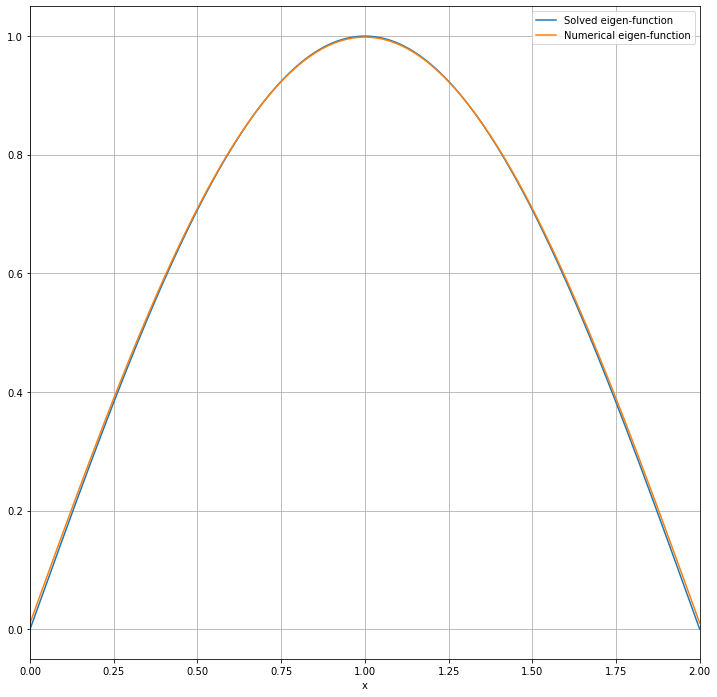

In [ ]:
# Verify the eigen_functions
# Visualizing the initial wavefunction
plt.figure(figsize=(12,12))
plt.xlabel("x")
plt.xlim(0,L)
plt.plot(x,isw_eigen_state(1,x), label='Solved eigen-function')
plt.plot(x,isw_numerical_phi[0], label='Numerical eigen-function')
plt.legend()
plt.grid()

In [ ]:
# TODO : Time-Evolution of the Superposition

"""
For Q2, we have a total of 3 cells, with points distribution as:
2 + 1 + 1 = 4
"""

'\nFor Q2, we have a total of 3 cells, with points distribution as:\n2 + 1 + 1 = 4\n'

### Q3. Time Evolution of the System using Matrix Exponential!

Now that we have the Hamiltonian of the system in form of a matrix, we can look into an alternative mechanism of time-evolution which does not involve finding components along the eigen-states and applying time-evolution to these componenents. In this mechanism, we will use something called the "matrix exponential"

As per the Schrodinger's Equation, 

$iħ\dfrac{∂\psi}{∂t} = Hψ$.

Instead of converting this into an eigen-value equation, if we treat $H$ as a constant of the system, and go on to solve the equation, we have:

$\dfrac{∂ψ}{ψ} = -\dfrac{iH}{ħ}∂t$

$\implies ln(\dfrac{\psi}{\psi_0}) = -\dfrac{iHt}{ħ}$

$\implies ψ = \psi_0e^{-\frac{iHt}{ħ}}$

But, H here is a matrix, and, so, the operation $e^H$ is called a matrix exponential.

In fact, $e^{-\frac{iHt}{ħ}}$ is an operator (that varies with time) which when acted on $ψ(x,0)$ produces $\psi(x,t)$

In [ ]:
# Total - 0.5 points
# Prepare psi as an equal superposition of the first N eigen-states as in part-1
N = 2
isw_psi_exp = 1/np.sqrt(N)*np.sum(isw_phi[:N], axis=0) # 0.5 points

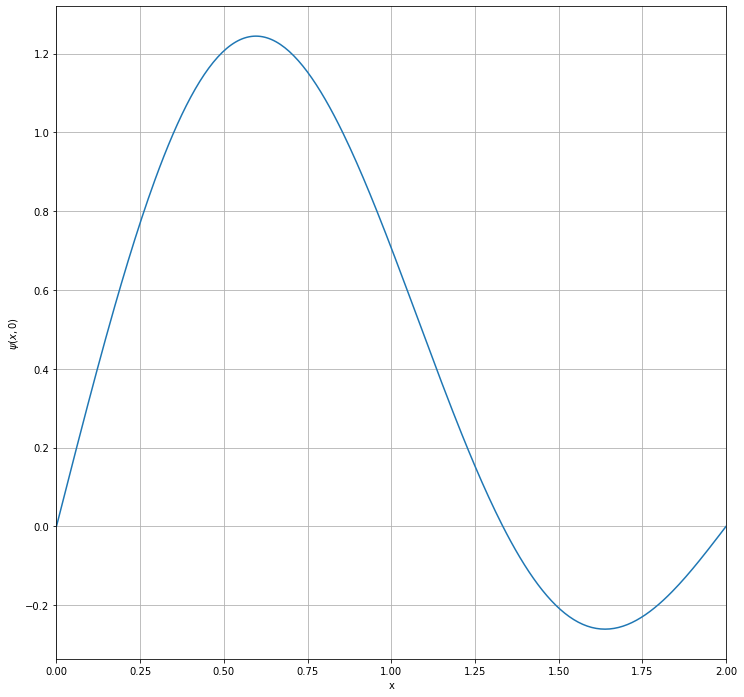

In [ ]:
# Visualizing the initial wavefunction
plt.figure(figsize=(12,12))
plt.xlabel("x")
plt.ylabel("$\psi(x,0)$")
plt.xlim(0,L)
plt.plot(x,isw_psi_exp)
plt.grid()

In [ ]:
isw_psi_exp = isw_psi_exp.reshape(NUM_DIVISIONS,1)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


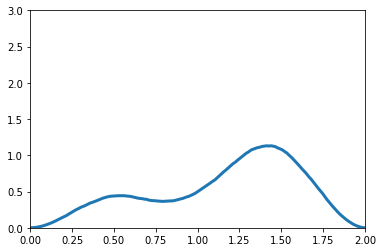

In [ ]:
# Total - 4.5 points
from scipy.linalg import expm
fig = plt.figure()
fig.set_size_inches((16,12))
axis = plt.axes(xlim=(0,L),ylim=(0,3))

line, = axis.plot([],[],lw=3)

def init():
  line.set_data([],[])
  return line

def animate(t):
  t*=250
  Ht = expm(-1j*t*H/H_BAR) # 1 - 2 points
  y = np.dot(Ht,isw_psi_exp) # 2 - 2 points
  y = normalize(y) 
  y = mod_psi_square(y) # 3 - 0.5 points
  line.set_data(x,y)
  return line

anim = FuncAnimation(fig,animate,init_func=init)
HTML(anim.to_html5_video())
# anim.save("Animation-2.mp4")

In [ ]:
"""
For Q3, we have a total of 2 cells with points distribution as:
0.5 + 4.5 = 5
"""

'\nFor Q3, we have a total of 2 cells with points distribution as:\n0.5 + 4.5 = 5\n'